<a href="https://colab.research.google.com/github/larissabral/comunicacoes_1_2023_1/blob/master/Trabalho_1_Comunica%C3%A7%C3%B5es_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AM síncrono

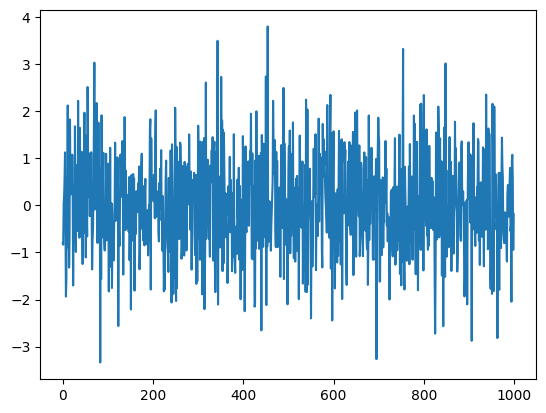

In [65]:
#importando as bibliotecas necessárias:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal

# Definindo os parâmetros do sinal
duracao = 5  # duração do sinal em segundos
frequencia_banda_base = 9600 # em Hz
frequencia_banda_intermediaria = 2000000 # em Hz
num_amostras = 1000
potencia_media = 1

# Gerando o sinal aleatório gaussiano branco
sinal_aleatorio = np.random.normal(0, 1, num_amostras)

plt.plot(sinal_aleatorio)
plt.show()

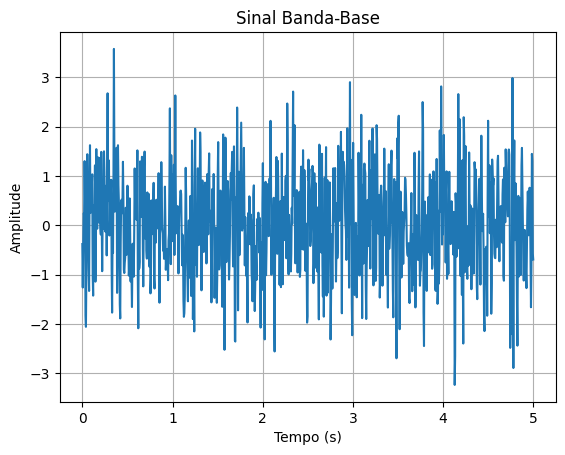

In [66]:
# Definindo os parâmetros do filtro passa-baixas
frequencia_corte = 3500  # frequência de corte do filtro em Hz

# Aplicando o filtro passa-baixas
filtro_passa_baixas = signal.firwin(num_amostras, frequencia_corte, fs = frequencia_banda_base)
sinal_banda_base_filtrado = signal.convolve(sinal_aleatorio, filtro_passa_baixas, mode='same')

# Normalizando o sinal pela raiz quadrada de sua potência média
potencia_media = np.mean(np.square(sinal_banda_base_filtrado))
sinal_normalizado = sinal_banda_base_filtrado / np.sqrt(potencia_media)
sinal_banda_base = sinal_normalizado

# Plotando o sinal no domínio do tempo
tempo = np.linspace(0, duracao, num_amostras)
plt.plot(tempo, sinal_banda_base)
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.title('Sinal Banda-Base')
plt.grid(True)
plt.show()

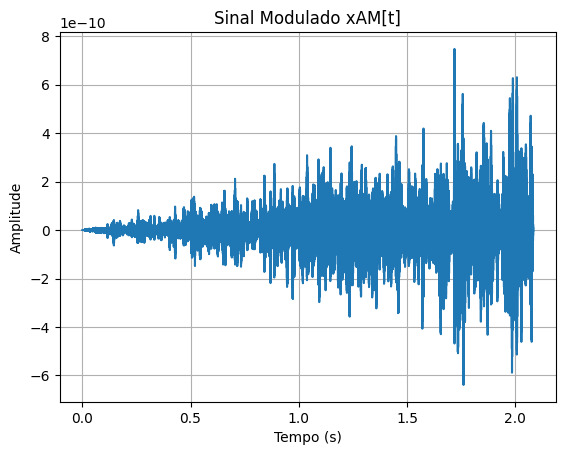

In [67]:
# Definindo os parâmetros da portadora
frequencia_portadora = 100000  # em Hz
amplitude_portadora = 1

# Reamostrando o sinal
sinal_reamostrado = signal.resample_poly(sinal_banda_base, frequencia_banda_intermediaria, frequencia_banda_base, padtype='mean')

# Gerando a portadora senoidal
t = np.arange(0, duracao,  1/frequencia_portadora)
portadora = amplitude_portadora * np.sin(2 * np.pi * frequencia_portadora * t)

# Modulando o sinal pela portadora
sinal_modulado = sinal_reamostrado * portadora[:len(sinal_reamostrado)]

# Plotando o sinal modulado
plt.figure()
plt.plot(t[:len(sinal_reamostrado)], sinal_modulado)
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.title('Sinal Modulado xAM[t]')
plt.grid(True)
plt.show()

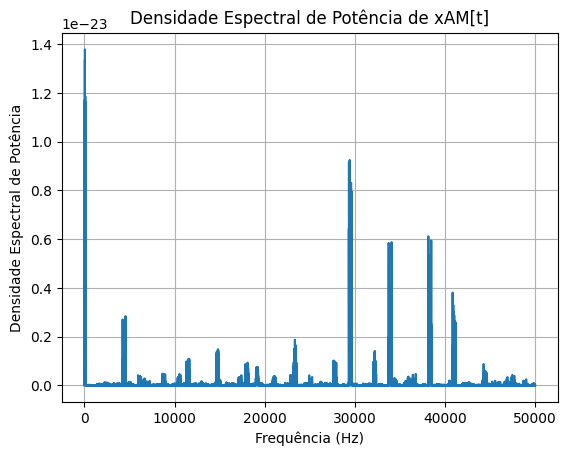

In [68]:
# Calculando e plotando a densidade espectral de potência
frequencias, densidade_espectral = signal.periodogram(sinal_modulado, fs=frequencia_portadora)
plt.figure()
plt.plot(frequencias, densidade_espectral)
plt.xlabel('Frequência (Hz)')
plt.ylabel('Densidade Espectral de Potência')
plt.title('Densidade Espectral de Potência de xAM[t]')
plt.grid(True)
plt.show()

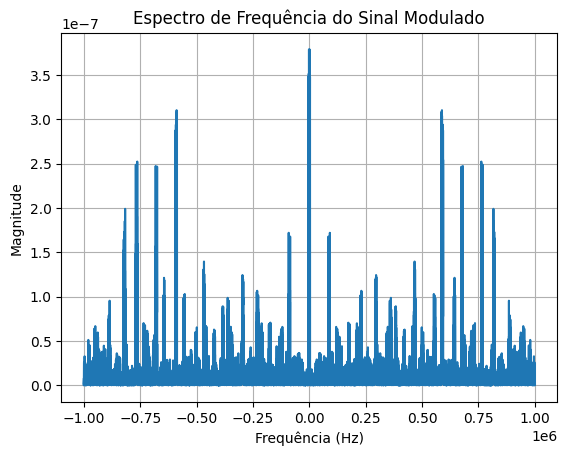

In [69]:
# Cálculo da transformada de Fourier
espectro = np.fft.fftshift(np.fft.fft(sinal_modulado))
frequencias = np.fft.fftshift(np.fft.fftfreq(len(espectro), 1/frequencia_banda_intermediaria))

# Plotando o sinal modulado no domínio da frequência
plt.figure()
plt.plot(frequencias, np.abs(espectro))
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude')
plt.title('Espectro de Frequência do Sinal Modulado')
plt.grid(True)
plt.show()

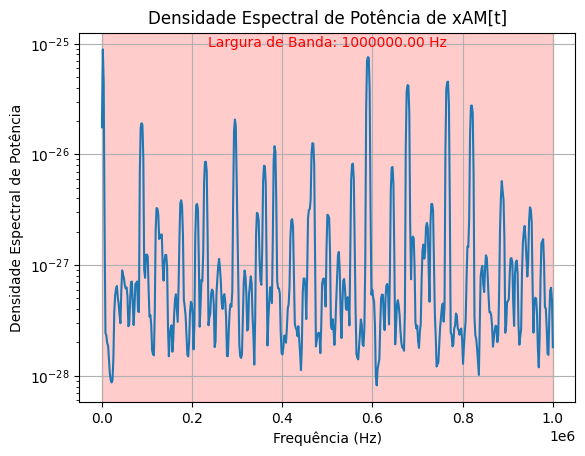

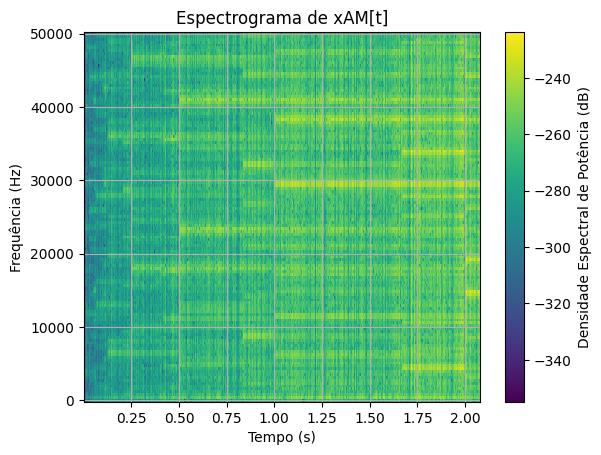

In [70]:
# Cálculo da densidade espectral de potência
frequencias, densidade_potencia = signal.welch(sinal_modulado, fs=frequencia_banda_intermediaria, nperseg=1024)

# Determinação da largura de banda
largura_banda = frequencias.max() - frequencias.min()

# Plotando a densidade espectral de potência
plt.figure()
plt.semilogy(frequencias, densidade_potencia)
plt.xlabel('Frequência (Hz)')
plt.ylabel('Densidade Espectral de Potência')
plt.title('Densidade Espectral de Potência de xAM[t]')
plt.grid(True)
# Mostrando a largura de banda no gráfico
plt.axvspan(frequencias.min(), frequencias.max(), color='red', alpha=0.2)
plt.text(frequencias.min() + (largura_banda / 2), densidade_potencia.max(), f'Largura de Banda: {largura_banda:.2f} Hz',
         ha='center', va='bottom', color='red')

plt.show()

# Calculando o espectrograma do sinal modulado
frequencias, tempos, espectro = signal.spectrogram(sinal_modulado, fs=frequencia_portadora)

# Plotando o espectrograma
plt.figure()
plt.pcolormesh(tempos, frequencias, 10 * np.log10(espectro), shading='auto')
plt.colorbar(label='Densidade Espectral de Potência (dB)')
plt.xlabel('Tempo (s)')
plt.ylabel('Frequência (Hz)')
plt.title('Espectrograma de xAM[t]')
plt.grid(True)
plt.show()

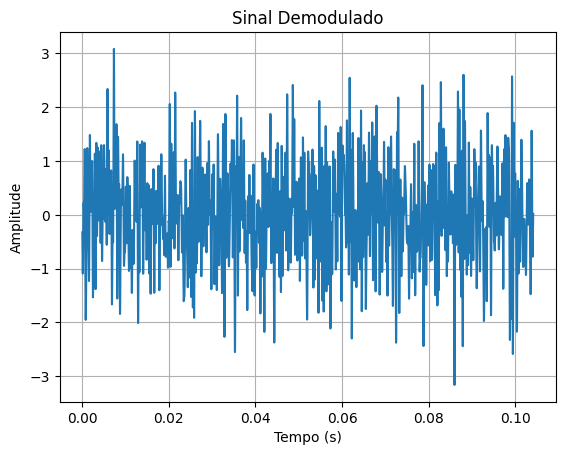

In [71]:
# Demodulação do sinal modulado
sinal_demodulado = sinal_modulado * portadora[:len(sinal_modulado)]

# Aplicando o filtro passa-baixas no sinal demodulado
frequencia_corte = 4000  # frequência de corte do filtro passa-baixas em Hz
filtro_passa_baixas_demod = signal.firwin(num_amostras, frequencia_corte, fs = frequencia_banda_base)
sinal_demodulado_filtrado = signal.convolve(sinal_aleatorio, filtro_passa_baixas, mode='same')

# Reamostragem do sinal demodulado para a taxa de amostragem original
sinal_demodulado_reamostrado = signal.resample_poly(sinal_demodulado_filtrado, frequencia_banda_intermediaria, frequencia_banda_base, padtype='mean')

# Plotando o sinal demodulado
# Plotando o sinal demodulado
tempo_demodulado = np.arange(0, len(sinal_demodulado_reamostrado) / frequencia_banda_intermediaria, 1 / frequencia_banda_intermediaria)
plt.plot(tempo_demodulado, sinal_demodulado_reamostrado)
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.title('Sinal Demodulado')
plt.grid(True)
plt.show()

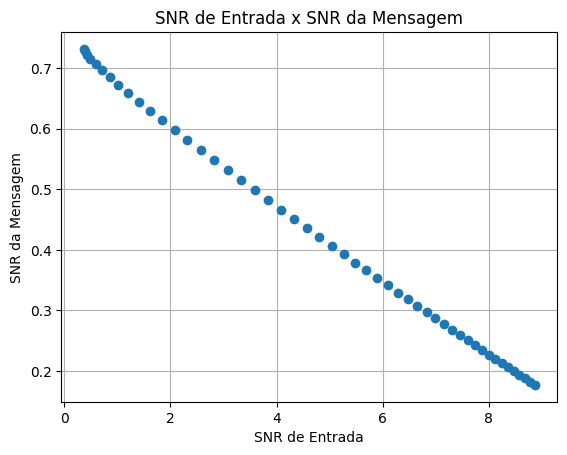

In [72]:
# Valores de α para adição de ruído
valores_alpha = np.linspace(0, 10, 50)

# Inicialização das listas para armazenar os valores de SNRi e SNRm
snr_entrada = []
snr_mensagem = []

tempo = np.arange(0, duracao, 1 / frequencia_banda_base)
sinal_modulado = amplitude_portadora * np.cos(2 * np.pi * frequencia_portadora * tempo)


# Geração do sinal de ruído gaussiano w[t]
ruido = np.random.normal(0, 1, len(tempo))

# Aplicação do filtro passa-baixas no sinal de ruído
frequencia_corte = 500000  # frequência de corte do filtro passa-baixas em Hz
filtro_passa_baixas = signal.firwin(num_amostras, frequencia_corte, fs = frequencia_banda_intermediaria)
ruido_filtrado = signal.convolve(ruido, filtro_passa_baixas, mode='same')

for alpha in valores_alpha:
    # Adição do ruído ao sinal modulado
    sinal_ruidoso = sinal_modulado + alpha * ruido_filtrado

    # Demodulação do sinal ruidoso
    sinal_demodulado = sinal_ruidoso * sinal_modulado

    # Filtro passa-baixas no sinal demodulado
    frequencia_corte_demod = 4000  # frequência de corte do filtro passa-baixas para demodulação em Hz
    filtro_passa_baixas_demod = signal.firwin(num_amostras, frequencia_corte, fs = frequencia_banda_intermediaria)
    sinal_demodulado_filtrado = signal.convolve(sinal_demodulado, filtro_passa_baixas, mode='same')

    # Cálculo das potências
    potencia_mensagem = np.mean(np.square(sinal_banda_base))
    potencia_diferenca = np.mean(np.square(sinal_banda_base - sinal_demodulado_filtrado[:len(sinal_banda_base)]))
    potencia_entrada = np.mean(np.square(sinal_ruidoso))

    # Cálculo das razões SNR
    snr_i = potencia_entrada / potencia_diferenca
    snr_m = potencia_mensagem / potencia_diferenca

    # Armazenamento dos valores de SNR
    snr_entrada.append(snr_i)
    snr_mensagem.append(snr_m)

# Plotagem dos pontos SNR de entrada x mensagem
plt.plot(snr_entrada, snr_mensagem, 'o')
plt.xlabel('SNR de Entrada')
plt.ylabel('SNR da Mensagem')
plt.title('SNR de Entrada x SNR da Mensagem')
plt.grid(True)
plt.show()


O gráfico mostra que há uma relação linear entre os valores, e, à medida que aumentamos o nível de ruído adicionado ao sinal modulado, tanto o SNR de entrada quanto o SNR da mensagem diminuem. No entanto, o SNR de entrada é sempre maior do que o SNR da mensagem, refletindo a degradação do sinal original causada pelo ruído. Isso ressalta a importância de minimizar o ruído em sistemas de comunicação para preservar a qualidade da mensagem transmitida.

# FM síncrono

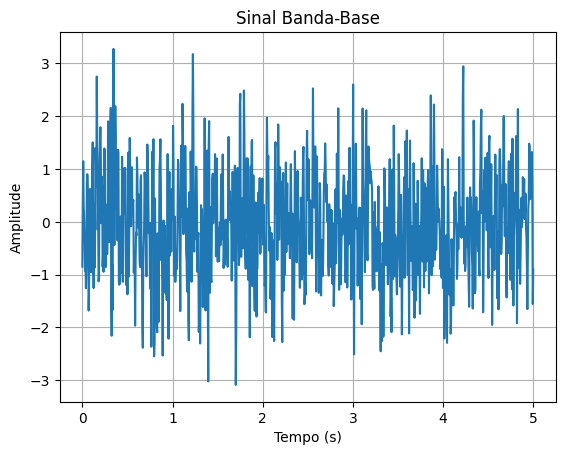

In [73]:
#importando as bibliotecas necessárias:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal

# Definindo os parâmetros do sinal
duracao = 5  # duração do sinal em segundos
frequencia_banda_base = 9600 # em Hz
frequencia_banda_intermediaria = 2000000 # em Hz
num_amostras = 1000
potencia_media = 1

# Gerando o sinal aleatório gaussiano branco
sinal_aleatorio = np.random.normal(0, 1, num_amostras)

# Definindo os parâmetros do filtro passa-baixas
frequencia_corte = 3500  # frequência de corte do filtro em Hz

# Aplicando o filtro passa-baixas
filtro_passa_baixas = signal.firwin(num_amostras, frequencia_corte, fs = frequencia_banda_base)
sinal_banda_base_filtrado = signal.convolve(sinal_aleatorio, filtro_passa_baixas, mode='same')

# Normalizando o sinal pela raiz quadrada de sua potência média
potencia_media = np.mean(np.square(sinal_banda_base_filtrado))
sinal_normalizado = sinal_banda_base_filtrado / np.sqrt(potencia_media)
sinal_banda_base = sinal_normalizado

# Plotando o sinal no domínio do tempo
tempo = np.linspace(0, duracao, num_amostras)
plt.plot(tempo, sinal_banda_base)
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.title('Sinal Banda-Base')
plt.grid(True)
plt.show()

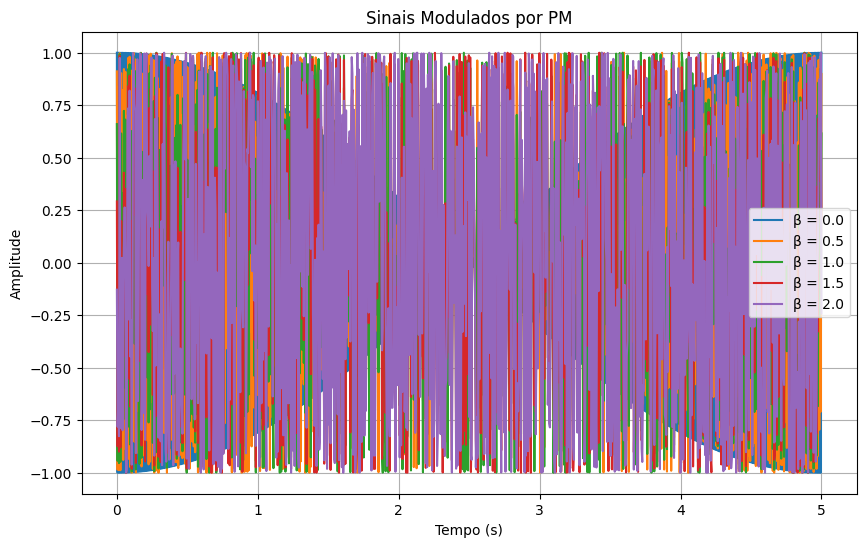

In [74]:
# Definição dos parâmetros da modulação PM
frequencia_portadora = 100000  # frequência da portadora em Hz
amplitude_portadora = 1  # amplitude da portadora em V
valores_beta = np.linspace(0, 2, 5)  # valores do índice de modulação a serem simulados

# Redimensionamento do sinal normalizado
sinal_normalizado_resized = np.resize(sinal_normalizado, num_amostras)

# Geração do vetor de tempo
t = np.linspace(0, duracao, num_amostras)

# Plotagem dos sinais modulados
plt.figure(figsize=(10, 6))
for i, beta in enumerate(valores_beta):
    sinal_modulado = amplitude_portadora * np.cos(2 * np.pi * frequencia_portadora * t + beta * sinal_normalizado_resized)
    plt.plot(t, sinal_modulado, label=f'β = {beta}')

plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.title('Sinais Modulados por PM')
plt.legend()
plt.grid(True)
plt.show()


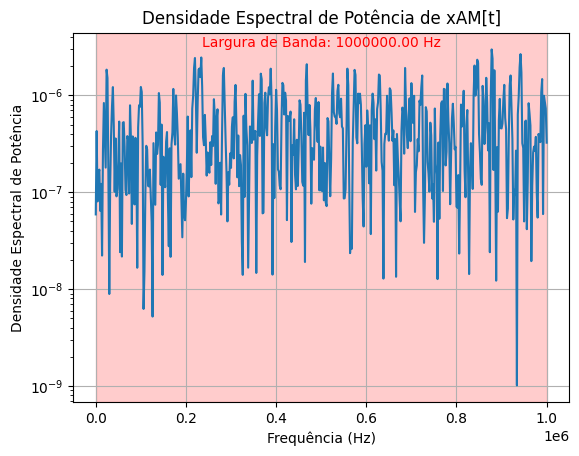

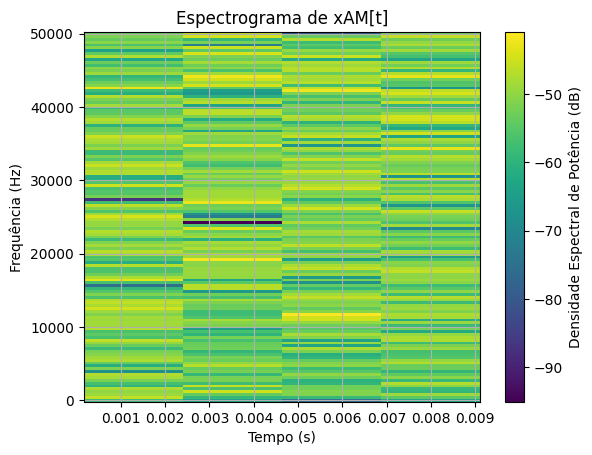

In [75]:
# Cálculo da densidade espectral de potência
frequencias, densidade_potencia = signal.welch(sinal_modulado, fs=frequencia_banda_intermediaria, nperseg=1024)

# Determinação da largura de banda
largura_banda = frequencias.max() - frequencias.min()

# Plotando a densidade espectral de potência
plt.figure()
plt.semilogy(frequencias, densidade_potencia)
plt.xlabel('Frequência (Hz)')
plt.ylabel('Densidade Espectral de Potência')
plt.title('Densidade Espectral de Potência de xAM[t]')
plt.grid(True)
# Mostrando a largura de banda no gráfico
plt.axvspan(frequencias.min(), frequencias.max(), color='red', alpha=0.2)
plt.text(frequencias.min() + (largura_banda / 2), densidade_potencia.max(), f'Largura de Banda: {largura_banda:.2f} Hz',
         ha='center', va='bottom', color='red')

plt.show()

# Calculando o espectrograma do sinal modulado
frequencias, tempos, espectro = signal.spectrogram(sinal_modulado, fs=frequencia_portadora)

# Plotando o espectrograma
plt.figure()
plt.pcolormesh(tempos, frequencias, 10 * np.log10(espectro), shading='auto')
plt.colorbar(label='Densidade Espectral de Potência (dB)')
plt.xlabel('Tempo (s)')
plt.ylabel('Frequência (Hz)')
plt.title('Espectrograma de xAM[t]')
plt.grid(True)
plt.show()

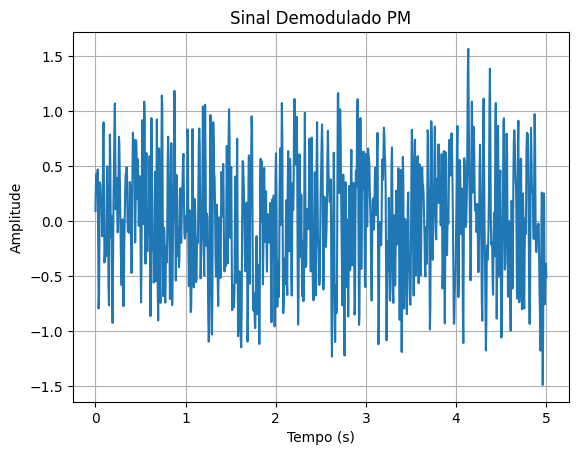

In [76]:
# Demodulando o sinal para 1 valor de beta

# Geração do vetor de tempo
t = np.linspace(0, duracao, num_amostras)

# Demodulando o sinal modulado
frequencia_corte_demod = 8000
sinal_demodulado = np.imag(signal.hilbert(sinal_modulado)) * np.cos(2 * np.pi * frequencia_portadora * t) - \
                   np.real(signal.hilbert(sinal_modulado)) * np.sin(2 * np.pi * frequencia_portadora * t)

# Filtrando o sinal demodulado com um filtro passa-baixas
frequencia_corte_demod_rad = 2 * np.pi * frequencia_corte_demod / frequencia_portadora
b, a = signal.butter(4, frequencia_corte_demod_rad, 'low', analog=False)
sinal_demodulado_filtrado = signal.lfilter(b, a, sinal_demodulado)

# Plotando o sinal demodulado filtrado
plt.figure()
plt.plot(t[:len(sinal_demodulado_filtrado)], sinal_demodulado_filtrado)
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.title('Sinal Demodulado PM')
plt.grid(True)
plt.show()


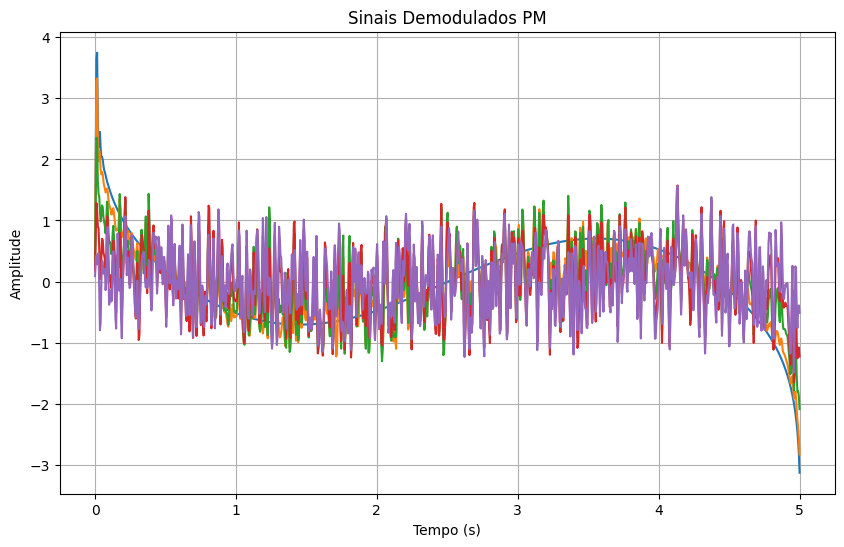

In [77]:
# Demodulando o sinal para varios valores de beta

# Geração do vetor de tempo
t = np.linspace(0, duracao, num_amostras)

# Plotagem dos sinais demodulados
plt.figure(figsize=(10, 6))
for i, beta in enumerate(valores_beta):
    sinal_modulado = amplitude_portadora * np.cos(2 * np.pi * frequencia_portadora * t + beta * sinal_normalizado_resized)

    # Demodulando o sinal modulado
    frequencia_corte_demod = 8000
    sinal_demodulado = np.imag(signal.hilbert(sinal_modulado)) * np.cos(2 * np.pi * frequencia_portadora * t) - \
                      np.real(signal.hilbert(sinal_modulado)) * np.sin(2 * np.pi * frequencia_portadora * t)

    # Filtrando o sinal demodulado com um filtro passa-baixas
    frequencia_corte_demod_rad = 2 * np.pi * frequencia_corte_demod / frequencia_portadora
    b, a = signal.butter(4, frequencia_corte_demod_rad, 'low', analog=False)
    sinal_demodulado_filtrado = signal.lfilter(b, a, sinal_demodulado)

    plt.plot(t[:len(sinal_demodulado_filtrado)], sinal_demodulado_filtrado, label=f'β = {beta}')


plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.title('Sinais Demodulados PM')
plt.grid(True)
plt.show()


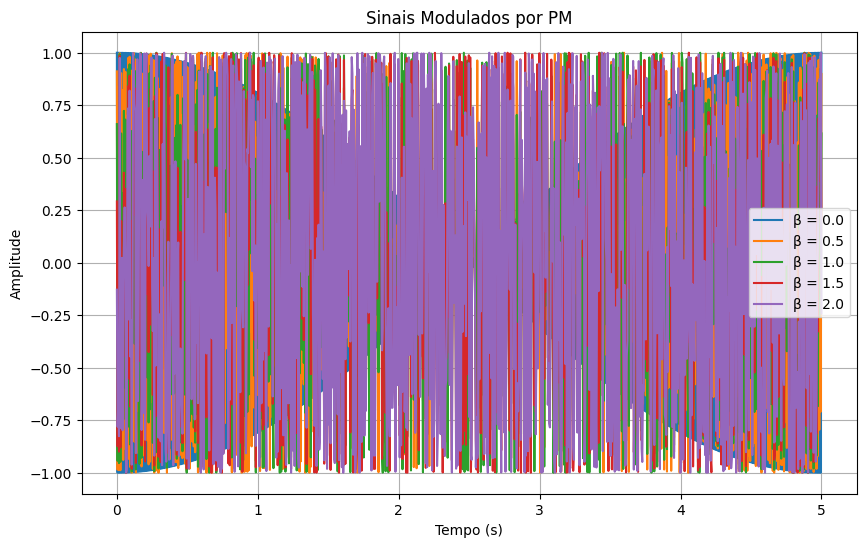

In [78]:
# Computando a integral do sinal m[n]
sinal_integral = np.cumsum(sinal_banda_base)

# Normalizando o sinal integral pela raiz quadrada da sua potência média
potencia_media_integral = np.mean(np.square(sinal_integral))
sinal_integral_normalizado = sinal_integral / np.sqrt(potencia_media_integral)

# Plotagem dos sinais modulados por FM
plt.figure(figsize=(10, 6))
for i, beta in enumerate(valores_beta):
    sinal_modulado_fm = amplitude_portadora * np.cos(2 * np.pi * frequencia_portadora * t + beta * sinal_normalizado_resized)
    plt.plot(t, sinal_modulado_fm, label=f'β = {beta}')

plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.title('Sinais Modulados por PM')
plt.legend()
plt.grid(True)
plt.show()



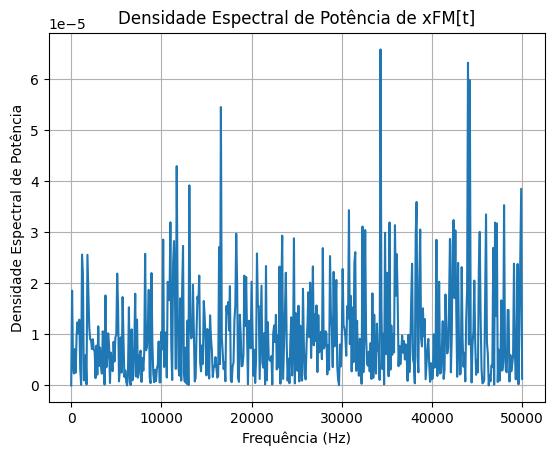

In [79]:

# Calculando e plotando a densidade espectral de potência
frequencias, densidade_espectral = signal.periodogram(sinal_modulado_fm, fs=frequencia_portadora)
plt.figure()
plt.plot(frequencias, densidade_espectral)
plt.xlabel('Frequência (Hz)')
plt.ylabel('Densidade Espectral de Potência')
plt.title('Densidade Espectral de Potência de xFM[t]')
plt.grid(True)
plt.show()

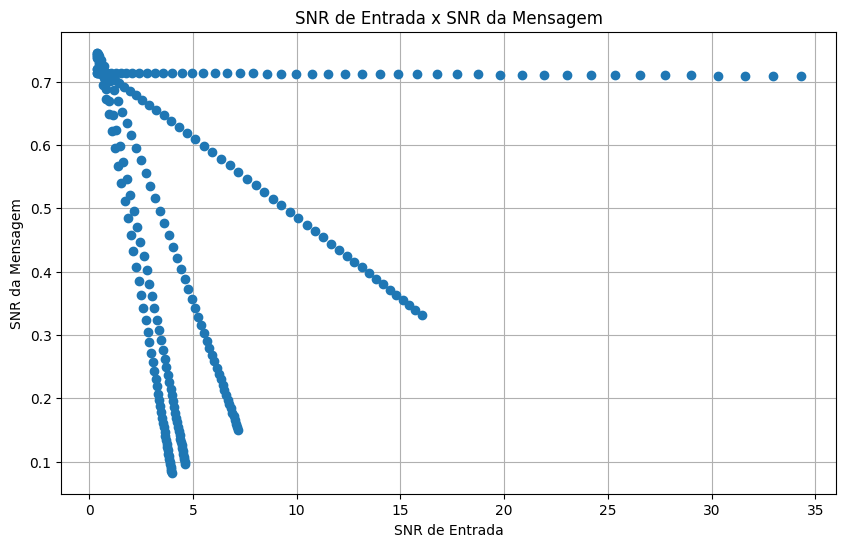

In [80]:
# Valores de α para adição de ruído
valores_alpha = np.linspace(0, 10, 50)

# Inicialização das listas para armazenar os valores de SNRi e SNRm
snr_entrada = []
snr_mensagem = []

tempo = np.arange(0, duracao, 1 / frequencia_banda_base)
sinal_modulado = amplitude_portadora * np.cos(2 * np.pi * frequencia_portadora * tempo)


# Geração do sinal de ruído gaussiano w[t]
ruido = np.random.normal(0, 1, len(tempo))

# Aplicação do filtro passa-baixas no sinal de ruído
frequencia_corte = 500000  # frequência de corte do filtro passa-baixas em Hz
filtro_passa_baixas = signal.firwin(num_amostras, frequencia_corte, fs = frequencia_banda_intermediaria)
ruido_filtrado = signal.convolve(ruido, filtro_passa_baixas, mode='same')

# Plotagem dos sinais modulados
plt.figure(figsize=(10, 6))
for i, beta in enumerate(valores_beta):
    sinal_modulado = amplitude_portadora * np.cos(2 * np.pi * frequencia_portadora * t + beta * sinal_normalizado_resized)
    for alpha in valores_alpha:
        # Adição do ruído ao sinal modulado
        sinal_ruidoso = sinal_modulado + alpha * ruido_filtrado[:len(sinal_modulado)]

        # Demodulação do sinal ruidoso
        sinal_demodulado = sinal_ruidoso * sinal_modulado

        # Filtro passa-baixas no sinal demodulado
        frequencia_corte_demod = 4000  # frequência de corte do filtro passa-baixas para demodulação em Hz
        filtro_passa_baixas_demod = signal.firwin(num_amostras, frequencia_corte, fs = frequencia_banda_intermediaria)
        sinal_demodulado_filtrado = signal.convolve(sinal_demodulado, filtro_passa_baixas, mode='same')

        # Cálculo das potências
        potencia_mensagem = np.mean(np.square(sinal_banda_base))
        potencia_diferenca = np.mean(np.square(sinal_banda_base - sinal_demodulado_filtrado[:len(sinal_banda_base)]))
        potencia_entrada = np.mean(np.square(sinal_ruidoso))

        # Cálculo das razões SNR
        snr_i = potencia_entrada / potencia_diferenca
        snr_m = potencia_mensagem / potencia_diferenca

        # Armazenamento dos valores de SNR
        snr_entrada.append(snr_i)
        snr_mensagem.append(snr_m)


# Plotagem dos pontos SNR de entrada x mensagem
plt.plot(snr_entrada, snr_mensagem, 'o')
plt.xlabel('SNR de Entrada')
plt.ylabel('SNR da Mensagem')
plt.title('SNR de Entrada x SNR da Mensagem')
plt.grid(True)
plt.show()


Ao observar os resultados, o comportamento esperado é que o SNR da mensagem aumente à medida que o SNR de entrada aumenta. Isso ocorre porque um maior SNR de entrada indica uma relação sinal-ruído mais favorável, o que resulta em uma melhor reconstrução da mensagem original após a demodulação.

No gráfico dos pontos SNR de entrada versus SNR da mensagem, é esperado que os pontos estejam agrupados em torno de uma linha diagonal crescente, indicando a relação entre as duas grandezas. Caso haja uma alta dispersão dos pontos ou uma relação não linear, isso pode indicar algum problema no processo de modulação e demodulação, ou na adição do ruído.